In [1]:
# Flyttly  Data Science Test
# Importing the library files
import pandas as pd 
import numpy as np 
import nbconvert 
from sklearn.linear_model import LinearRegression


In [2]:
# Part : 0)
#qusetion no.1 ) Reading the data 

# Importing the dataset into the dataframe 

data=pd.read_csv('Fytlyff_DS_Interview.csv')

# checking is the data set imported properly or not ?

data.head(3)

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461


In [3]:
# question no. 2) Observing the column name and column datatypes   

l1=data.dtypes
l2=data.columns

# merging these two list to from the dataframe
l3=pd.DataFrame(list(zip(l2,l1)),columns=['Columns','Datatypes'])
l3.head(10)

,Columns,Datatypes
0,Year,int64
1,Month,object
2,MobileWeb_or_Web,object
3,Type_of_Customers?,object
4,Where_Are_They_comming_from?,object
5,Which_Place_in_India?,object
6,How_many_Landed_on_our_Page?,float64
7,How_many_Landed_on_the_our_Page_and_clicked_on...,float64
8,How_many_Landed_on_the_our_Page_and_clicked_on...,int64
9,How_many_Landed_on_the_our_Page_and_clicked_on...,int64


In [4]:
# Part 1 ) Data Cleaning 

# making the function to clean the data 

def data_cleaning(dat1):
    # replacing the null values with the zero
    
    dat1=dat1.fillna(0)   
    
    # Replacing the values with the month with the particular number
    
    dat1['Month']=dat1['Month'].replace(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
    
    # Replacing the values with the "Came_From_Google" to "Google" "Landed_on_the_page_Directly" to "Direct_traffic"
    
    dat1['Where_Are_They_comming_from?']=dat1["Where_Are_They_comming_from?"].replace(["Came_From_Google","Landed_on_the_page_Directly"],["Google","Direct_traffic"])
    data=dat1
    return data

data=data_cleaning(data)


In [5]:

# Part 2 ) Descriptive Statistics 
#) Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns
#) Produce a list of all the unique values & data types present in the non-numeric columns
# storing the values in the list to calculate the median 
t1=data['How_many_Landed_on_our_Page?']

t2=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']

t3=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?']

t4=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

In [6]:
#) Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns
def descriptive_stats(data):
    a1=data.describe()
    a1=a1.drop(columns={'Year'})
    a1=a1.drop(['count','min','max'])
    a1=a1.rename(index={5:'Median'})
    return a1
descriptive_stats(data)

,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
mean,6.500000,392247.442593,179228.131944,151072.456019,59221.291204
std,3.452852,955577.328614,395156.221812,235353.822907,86465.639532
25%,3.750000,0.000000,0.000000,33608.000000,11577.250000
50%,6.500000,12283.500000,4212.500000,70649.500000,27004.500000
75%,9.250000,381642.250000,173045.250000,165959.000000,71853.500000


In [7]:
# Find the all the unqiue Value of the non numeric values with there datatypes

q1=data['MobileWeb_or_Web'].unique()
q2=data['Type_of_Customers?'].unique()
q3=data['Where_Are_They_comming_from?'].unique()
q4=data['Which_Place_in_India?'].unique()

In [8]:
print("The MobileWeb_or_Web columns are :",q1,data['MobileWeb_or_Web'].dtypes)
print('The Type_of_customers columns :',q2,data['Type_of_Customers?'].dtypes)
print('Where are they comming from  columns:',q3,data['Where_Are_They_comming_from?'].dtypes)
print('Which place in India columns :',q4,data['Which_Place_in_India?'].dtypes)

The MobileWeb_or_Web columns are : ['Desktop_Website' 'Mobile_website'] object
The Type_of_customers columns : ['Existing_Customer' 'New_Customer'] object
Where are they comming from  columns: ['Google' 'Direct_traffic' 'Unidentified_Sources'] object
Which place in India columns : ['Bangalore' 'Chennai' 'Dehradun' 'Indore' 'Pune'] object


In [9]:
# part 3 Prescriptive Statistics )
# 3) “Which_Place_in_India?”  has the highest “How_many_Landed_on_the_our_Page?”
ao1=data[data['How_many_Landed_on_our_Page?']==data['How_many_Landed_on_our_Page?'].max()]
ao1['Which_Place_in_India?']


984    Pune
Name: Which_Place_in_India?, dtype: object

In [10]:
# 4) “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?”
for i in data['How_many_Landed_on_our_Page?']:
    if i==0:
        
        data['How_many_Landed_on_our_Page?']=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']
        data['avg']=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/data['How_many_Landed_on_our_Page?']
  
    else:
        data['avg']=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/data['How_many_Landed_on_our_Page?']
n1=data[data['avg']==data.avg.max()]
data.avg.max()

1.0

In [11]:
# Part 4 ) 


# Lets go through these steps 

data

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,avg
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,17178,0.0,56892,17178,1.0
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,11916,0.0,41460,11916,1.0
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,19461,0.0,55561,19461,1.0
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,110667,0.0,320923,110667,1.0
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,46033,0.0,220937,46033,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2155,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,1882,21255.0,6984,1882,1.0
2156,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Chennai,16703,156510.0,46676,16703,1.0
2157,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,2089,27770.0,7515,2089,1.0
2158,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Indore,78465,310836.0,161575,78465,1.0


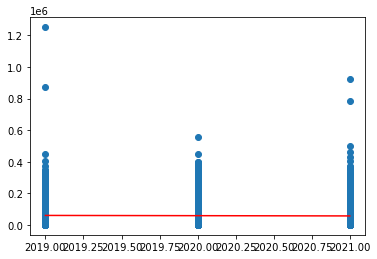

THe number Predicted for 2022 : [[56091.08009259]]
THe MAPE predicted for 2021: 2752.854312130055


In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib  inline 
global pred_a
def pred_future(data):
    l10=data['Year']
    l20=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

    # merging these two list to from the dataframe
    l30=pd.DataFrame(list(zip(l10,l20)),columns=['Year','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'])
    
    x=np.array(l10)
    y=np.array(l20)
    linreg=LinearRegression()
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    linreg.fit(x,y)
    y_pred=linreg.predict(x)
    plt.scatter(x,y)
    plt.plot(x,y_pred,color="red")
    plt.show()
    m=linreg.coef_
    z=linreg.intercept_
    #predicted value of the 2022 with the help of Linear Regression Model 
    n=m*2022+z
    #Predicted value of the 2021  with the help of linear Regression model
    n1=m*2021+z  
    pred_a=n
    k=l30[l30['Year']==2021]
    t10=k["Year"]
    t11=k['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']# actual value of the 2021
    # Finding the MAPE of the 2021
    
    t10,t11=np.array(t10),np.array(t11)
    MAPE=np.mean(np.abs((t10-n1)/t10))*100
    print("THe number Predicted for 2022 :",n)
    print("THe MAPE predicted for 2021:",MAPE)
    # The given grpah has less correlation 
    
    
pred_future(data)

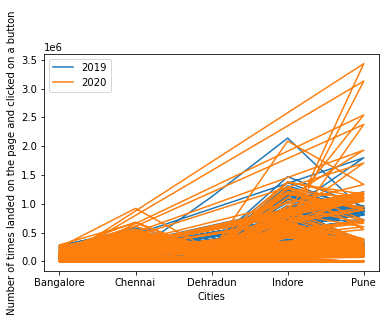

In [13]:
#)  Data Visualization 
#)A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020.

la=data[data['Year']==2019]
lb=data[data['Year']==2020]


x1=la['Which_Place_in_India?']
y1=la['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']
y2=lb['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']
x2=lb['Which_Place_in_India?']
l33=pd.DataFrame(list(zip(y1,y2,x1)),columns=['2019','2020','place in india'])
plt.plot(x1,y1,label=2019)
plt.plot(x2,y2,label=2020)
plt.xlabel("Cities")
plt.ylabel(' Number of times landed on the page and clicked on a button ')
plt.legend()
plt.show()





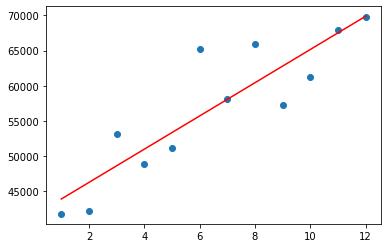

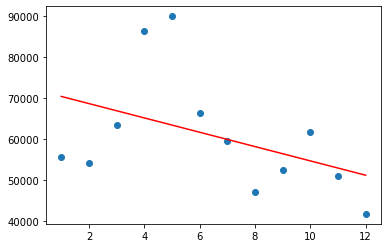

(array([[2364.86736597]]),
 array([41505.63434343]),
 array([[4823267.44832945]]))

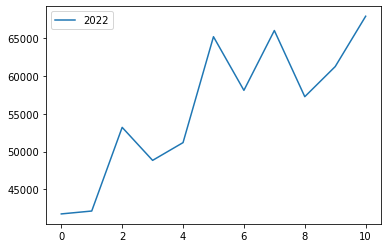

In [16]:
#) A line graph of the actual and projected number of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the months of the year 2021 & 2022
def pred1_future(data):
    month=[1,2,3,4,5,6,7,8,9,10,11,12]
    data1=data[data['Year']==2021]
    data2=data[data['Year']==2020]
    w0=data1[data1['Month']==1]
    w1=data1[data1['Month']==2]
    w2=data1[data1['Month']==3]
    w3=data1[data1['Month']==4]
    w4=data1[data1['Month']==5]
    w5=data1[data1['Month']==6]
    w6=data1[data1['Month']==7]
    w7=data1[data1['Month']==8]
    w8=data1[data1['Month']==9]
    w9=data1[data1['Month']==10]
    w10=data1[data1['Month']==11]
    w11=data1[data1['Month']==12]
    z0=data2[data2['Month']==1]
    z1=data2[data2['Month']==2]
    z2=data2[data2['Month']==3]
    z3=data2[data2['Month']==4]
    z4=data2[data2['Month']==5]
    z5=data2[data2['Month']==6]
    z6=data2[data2['Month']==7]
    z7=data2[data2['Month']==8]
    z8=data2[data2['Month']==9]
    z9=data2[data2['Month']==10]
    z10=data2[data2['Month']==11]
    z11=data2[data2['Month']==12]
    a1=[w0['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w1['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w2['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w3['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w4['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w5['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w6['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w7['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w8['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w9['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w10['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),w11['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean()]
    a2=[z0['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z1['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z2['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z3['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z4['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z5['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z6['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z7['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z8['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z9['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z10['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean(),z11['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].mean()]
    # merging these two list to from the dataframe
    
    
    x=np.array(month)
    y=np.array(a1)
    linreg=LinearRegression()
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    linreg.fit(x,y)
    y_pred=linreg.predict(x)
    plt.scatter(x,y)
    plt.plot(x,y_pred,color="red")
    plt.show()
    m=linreg.coef_
    z=linreg.intercept_
    out=m*2022+z
    
    x21=np.array(month)
    y21=np.array(a2)
    linreg=LinearRegression()
    x21=x21.reshape(-1,1)
    y21=y21.reshape(-1,1)
    linreg.fit(x21,y21)
    y_pred1=linreg.predict(x21)
    plt.scatter(x21,y21)
    plt.plot(x21,y_pred1,color="red")
    plt.show()
    k2=linreg.coef_
    k3=linreg.intercept_
    month=[1,2,3,4,5,6,7,8,9,10,11,12]
    i8=[out,out+z,out+z,out+z,out+z,out+z,out+z,out+z,out+z,out+z,out+z]
    l35=pd.DataFrame(list(zip(a1,i8)),columns=[2022,2021])
    l35.plot()
    
    return m,z,out
    
    
pred1_future(data)